In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [44]:
# Cargamos y verificamos el conjunto de datos
data_plants = pd.read_csv('iris.csv')


print('-------------------Verificación de filas duplicadas---------------------------------------')

# Verificar si hay filas duplicadas
duplicados = data_plants.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

print('------------------------------------------------------------------------------------------')

# Eliminar duplicados si los hay
if duplicados > 0:
    data_plants = data_plants.drop_duplicates()
    print("Duplicados eliminados")
print('------------------------------------------------------------------------------------------')

print('--------------------- Análisis de Datos Faltantes o Null ---------------------------------')

# Verificar si hay valores faltantes
print(data_plants.isnull().sum())

print('------------------------- Distribución de clases en los datos ----------------------------')

# Revisar distribución de clases para evitar desbalance en las clases.
print(data_plants['Species'].value_counts())

print('------------------------------------------------------------------------------------------')




-------------------Verificación de filas duplicadas---------------------------------------
Número de filas duplicadas: 0
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
--------------------- Análisis de Datos Faltantes o Null ---------------------------------
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
------------------------- Distribución de clases en los datos ----------------------------
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [ ]:
# Asignación de variables independientes y dependientes
X = data_plants[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data_plants['Species']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos dado que utilizamos un algortimo de optimizacion o de distancia
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [46]:
# Crear y entrenar el modelo
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)
y_train_pred = modelo.predict(X_train)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))
print("Matriz de confusión:")
print(conf_matrix)



Precisión del modelo: 1.0000
Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [56]:
print('---------------------- Reporte Clasificación --------------------------')
# Reporte de clasificación
print(classification_report(y_test, y_pred))

print('---------------------- Validación Cruzada -----------------------------') #Util para modelos con posibilidad de sobreajuste. Modelos con pocos datos.
# Validación cruzada
scores = cross_val_score(modelo, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")

print('-----------------------------------------------------------------------')

---------------------- Reporte Clasificación --------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

---------------------- Validación Cruzada -----------------------------
Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9733333333333334
-----------------------------------------------------------------------


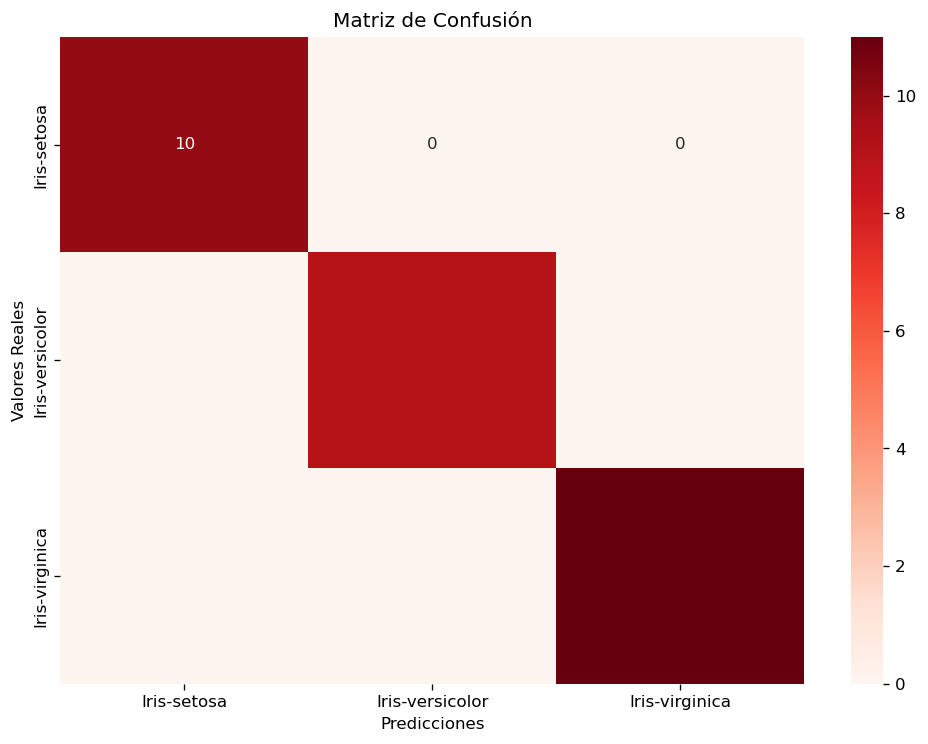

In [58]:
# Figura de matriz de confusión
plt.figure(figsize=(10, 7), dpi=120)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()